# Overview

This notebook demonstrates the ring artifact removal quality for different modes:

- "Express": notch filter -> collaborative wiener filter
- "Simple": notch filter -> collaborative wiener filter -> global fourier filter -> collaborative wiener filter
- "Full": hard thresholding -> global fourier filter -> hard thresholding -> collaborative wiener filter -> global fourier filter -> collaborative wiener filter


## Prepare data

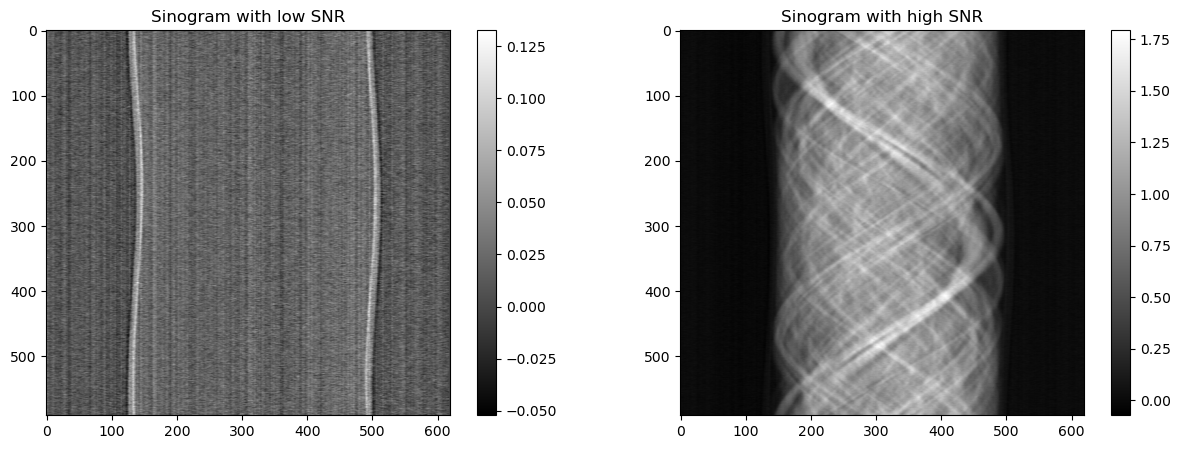

In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Set the GPU device ID to 0 for this notebook session
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

this_dir = os.path.abspath("")
data_dir = os.path.join(this_dir, "../tests/bm3dornl-data")
datafile = os.path.join(data_dir, "tomostack_small.h5")

# Load the data and select a noisy sinogram
with h5py.File(datafile, "r") as f:
    tomo_stack_noisy = f["noisy_tomostack"][:]

# Select a sinogram with low SNR
sino_low_snr = tomo_stack_noisy[:, 10, :]

# Select a sinogram with high SNR
sino_high_snr = tomo_stack_noisy[:, 250, :]

# Plot the sinograms
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(sino_low_snr, cmap="gray")
plt.colorbar()
plt.title("Sinogram with low SNR")
plt.subplot(122)
plt.imshow(sino_high_snr, cmap="gray")
plt.colorbar()
plt.title("Sinogram with high SNR")
plt.show()

In [2]:
from bm3dornl.bm3d import bm3d_ring_artifact_removal

In [3]:
block_matching_kwargs: dict = {
    "patch_size": (8, 8),
    "stride": 3,
    "background_threshold": 0.0,
    "cut_off_distance": (64, 64),
    "num_patches_per_group": 32,
    "padding_mode": "circular",
}

In [4]:
filter_kwargs: dict = {
    "filter_function": "fft",
    "shrinkage_factor": 3e-2,
}

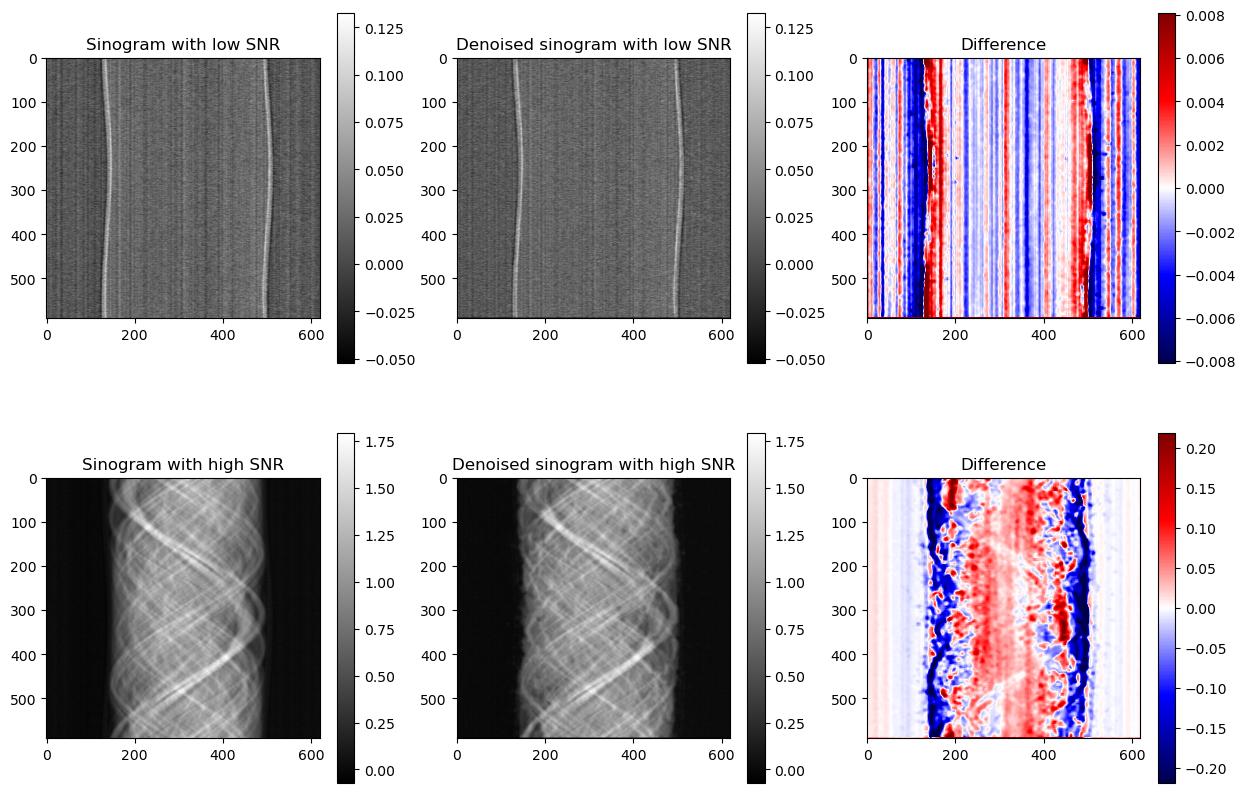

In [5]:
kwargs = {
    "mode": "express",
    "block_matching_kwargs": block_matching_kwargs,
    "filter_kwargs": filter_kwargs,
}

# Apply BM3D to the sinogram with low SNR
sino_low_snr_denoised = bm3d_ring_artifact_removal(sino_low_snr, **kwargs)

# Apply BM3D to the sinogram with high SNR
sino_high_snr_denoised = bm3d_ring_artifact_removal(sino_high_snr, **kwargs)

# Plot the denoised sinograms
# top: low_sino, diff
# bottom: high_sino, diff
plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow(sino_low_snr, cmap="gray")
plt.colorbar()
plt.title("Sinogram with low SNR")
plt.subplot(232)
plt.imshow(sino_low_snr_denoised, cmap="gray")
plt.colorbar()
plt.title("Denoised sinogram with low SNR")
plt.subplot(233)
diff = sino_low_snr - sino_low_snr_denoised
cval = np.quantile(np.abs(diff), 0.98)
plt.imshow(diff, cmap="seismic", vmin=-cval, vmax=cval)
plt.colorbar()
plt.title("Difference")
plt.subplot(234)
plt.imshow(sino_high_snr, cmap="gray")
plt.colorbar()
plt.title("Sinogram with high SNR")
plt.subplot(235)
plt.imshow(sino_high_snr_denoised, cmap="gray")
plt.colorbar()
plt.title("Denoised sinogram with high SNR")
plt.subplot(236)
diff = sino_high_snr - sino_high_snr_denoised
cval = np.quantile(np.abs(diff), 0.98)
plt.imshow(diff, cmap="seismic", vmin=-cval, vmax=cval)
plt.colorbar()
plt.title("Difference")
plt.show()

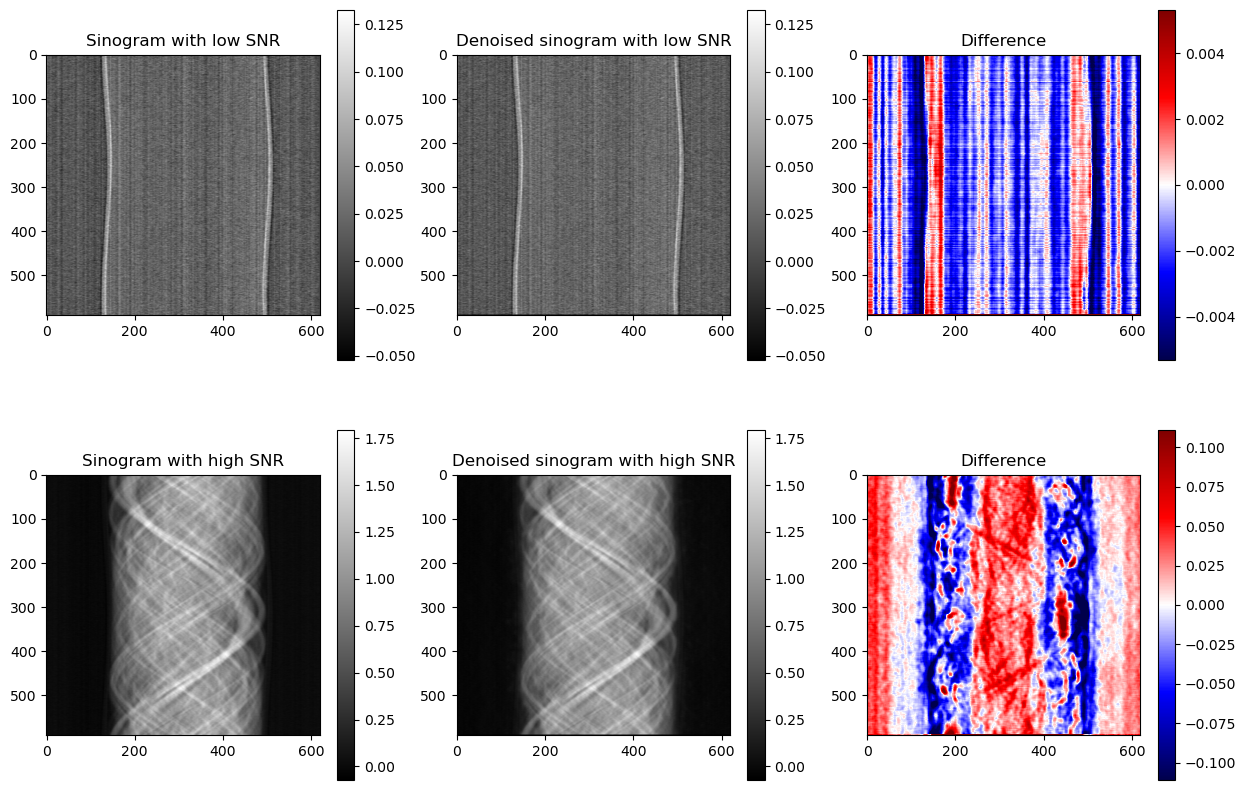

In [6]:
kwargs = {
    "mode": "simple",
    "block_matching_kwargs": block_matching_kwargs,
    "filter_kwargs": filter_kwargs,
}

# Apply BM3D to the sinogram with low SNR
sino_low_snr_denoised = bm3d_ring_artifact_removal(sino_low_snr, **kwargs)

# Apply BM3D to the sinogram with high SNR
sino_high_snr_denoised = bm3d_ring_artifact_removal(sino_high_snr, **kwargs)

# Plot the denoised sinograms
# top: low_sino, diff
# bottom: high_sino, diff
plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow(sino_low_snr, cmap="gray")
plt.colorbar()
plt.title("Sinogram with low SNR")
plt.subplot(232)
plt.imshow(sino_low_snr_denoised, cmap="gray")
plt.colorbar()
plt.title("Denoised sinogram with low SNR")
plt.subplot(233)
diff = sino_low_snr - sino_low_snr_denoised
cval = np.quantile(np.abs(diff), 0.98)
plt.imshow(diff, cmap="seismic", vmin=-cval, vmax=cval)
plt.colorbar()
plt.title("Difference")
plt.subplot(234)
plt.imshow(sino_high_snr, cmap="gray")
plt.colorbar()
plt.title("Sinogram with high SNR")
plt.subplot(235)
plt.imshow(sino_high_snr_denoised, cmap="gray")
plt.colorbar()
plt.title("Denoised sinogram with high SNR")
plt.subplot(236)
diff = sino_high_snr - sino_high_snr_denoised
cval = np.quantile(np.abs(diff), 0.98)
plt.imshow(diff, cmap="seismic", vmin=-cval, vmax=cval)
plt.colorbar()
plt.title("Difference")
plt.show()

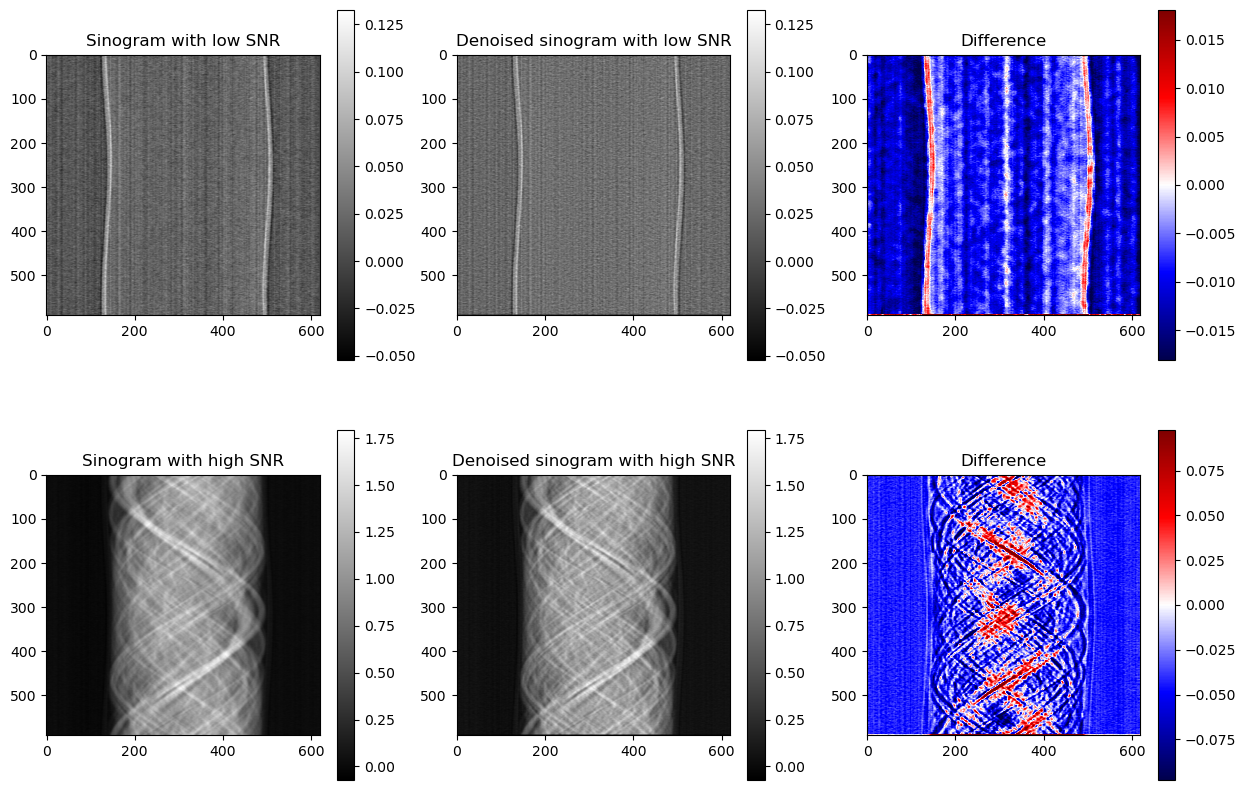

In [7]:
kwargs = {
    "mode": "full",
    "block_matching_kwargs": block_matching_kwargs,
    "filter_kwargs": filter_kwargs,
}

# Apply BM3D to the sinogram with low SNR
sino_low_snr_denoised = bm3d_ring_artifact_removal(sino_low_snr, **kwargs)

# Apply BM3D to the sinogram with high SNR
sino_high_snr_denoised = bm3d_ring_artifact_removal(sino_high_snr, **kwargs)

# Plot the denoised sinograms
# top: low_sino, diff
# bottom: high_sino, diff
plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow(sino_low_snr, cmap="gray")
plt.colorbar()
plt.title("Sinogram with low SNR")
plt.subplot(232)
plt.imshow(sino_low_snr_denoised, cmap="gray")
plt.colorbar()
plt.title("Denoised sinogram with low SNR")
plt.subplot(233)
diff = sino_low_snr - sino_low_snr_denoised
cval = np.quantile(np.abs(diff), 0.98)
plt.imshow(diff, cmap="seismic", vmin=-cval, vmax=cval)
plt.colorbar()
plt.title("Difference")
plt.subplot(234)
plt.imshow(sino_high_snr, cmap="gray")
plt.colorbar()
plt.title("Sinogram with high SNR")
plt.subplot(235)
plt.imshow(sino_high_snr_denoised, cmap="gray")
plt.colorbar()
plt.title("Denoised sinogram with high SNR")
plt.subplot(236)
diff = sino_high_snr - sino_high_snr_denoised
cval = np.quantile(np.abs(diff), 0.98)
plt.imshow(diff, cmap="seismic", vmin=-cval, vmax=cval)
plt.colorbar()
plt.title("Difference")
plt.show()